# Emotion Based Music Recommendation System

## The MuSe dataset contains sentiment information for 90,001 songs. The sentiment conveyed by a song is derived from the social tags given ot that song on Last.fm

### lastfm_url
 Last.fm page of the song

### track
 Song title

### artist
 Artist name

### seeds
The initial keyword(s) that seeded the scraping of this song

### number_of_emotion_tags
 Number of words that contributed to the emotion score of the song

### valence_tags
 Pleasantness dimension of the song

### arousal_tags
 Intensity dimension of the song

### dominance_tags
Control dimension of the song

### mbid
MusicBrainz Identifier of the song

### spotify_id
 Spotify Identifier of the song

# Importing modules

In [1]:
import numpy as np
import streamlit as st
import pandas as pd
import cv2
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt

2022-09-06 14:47:27.711 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


# Read csv file containing data.

In [2]:
df = pd.read_csv('muse_v3.csv')

In [16]:
df.isnull().sum()

lastfm_url                    0
track                         0
artist                        0
seeds                         0
number_of_emotion_tags        0
valence_tags                  0
arousal_tags                  0
dominance_tags                0
mbid                      28784
spotify_id                28371
genre                      6639
link                          0
name                          0
emotional                     0
pleasant                      0
dtype: int64

In [23]:
df.dtypes

lastfm_url                 object
track                      object
artist                     object
seeds                      object
number_of_emotion_tags      int64
valence_tags              float64
arousal_tags              float64
dominance_tags            float64
mbid                       object
spotify_id                 object
genre                      object
link                       object
name                       object
emotional                   int64
pleasant                  float64
dtype: object

In [18]:
df.genre

0                     rap
1                   metal
2                     rap
3                 hip-hop
4                   metal
               ...       
89996                 NaN
89997    progressive rock
89998                 NaN
89999                 NaN
90000             ambient
Name: genre, Length: 90001, dtype: object

In [19]:
unique_t1=df.number_of_emotion_tags.unique()

In [20]:
unique_t1

array([ 6,  8,  1, 13,  7,  9, 10, 20,  4,  3,  2, 11,  5, 12, 23, 15, 18,
       14, 16, 33, 32, 34, 22, 19, 21, 17, 26, 27, 37, 50, 41, 49, 28, 30,
       25, 24, 39, 47, 36, 35, 40, 38, 29, 31], dtype=int64)

In [ ]:
df.dtypes

In [ ]:
df.columns

## Percentage of Null Values

In [21]:
per_null_train = df.isnull().sum().sort_values(0, ascending = False)/(df.shape[0])*100
print(per_null_train.head())

mbid          31.981867
spotify_id    31.522983
genre          7.376585
lastfm_url     0.000000
track          0.000000
dtype: float64


## Treating the Null values

In [ ]:
df['genre'].mode()

In [ ]:
df['genre']=df['genre'].fillna('indie')

In [ ]:
df['mbid'].mode()

In [ ]:
df.dropna(subset=['mbid'], inplace=True)

In [ ]:
df.dropna(subset=['spotify_id'], inplace=True)

In [ ]:
df.isnull().sum()

# Displaying the Data

In [ ]:
df.shape

## Data Preprocessing

# Renaming column of dataframe.

In [4]:
df['link'] = df['lastfm_url']
df['name'] = df['track']
df['emotional'] = df['number_of_emotion_tags']
df['pleasant'] = df['valence_tags']

## Insights from the dataset

# Taking out useful column.

In [5]:
df1 = df[['name','emotional','pleasant','link','artist']]

In [ ]:
df1

# Sort column based on emotional & pleasant column value.
# Pleasant = degree of pleasant in that particular song.
# Emotional = emotional word used in that song.

In [6]:
df1 = df1.sort_values(by=["emotional", "pleasant"])
df1.reset_index()

,index,name,emotional,pleasant,link,artist
0,66148,XO TOUR Llif3,1,2.100000,https://www.last.fm/music/lil%2buzi%2bvert/_/x...,LIL UZI VERT
1,66199,SAD!,1,2.100000,https://www.last.fm/music/xxxtentacion/_/sad%2521,xxxtentacion
2,66247,Slow dancing in the dark,1,2.100000,https://www.last.fm/music/joji/_/slow%2bdancin...,Joji
3,66259,Hold Still,1,2.100000,https://www.last.fm/music/grizzly%2bbear/_/hol...,Grizzly Bear
4,66276,FML,1,2.100000,https://www.last.fm/music/kanye%2bwest/_/fml,Kanye West
...,...,...,...,...,...,...
89996,2140,Three Crosses,49,4.402000,https://www.last.fm/music/alaska/_/three%2bcro...,Alaska
89997,2142,Noose,49,4.402000,https://www.last.fm/music/alaska/_/noose,Alaska
89998,2143,Sacking Offence,49,4.402000,https://www.last.fm/music/alaska/_/sacking%2bo...,Alaska
89999,2144,Blacklist,49,4.402000,https://www.last.fm/music/alaska/_/blacklist,Alaska


In [29]:
df1['artist'].value_counts().head()

志方あきこ              302
Skerror            284
Robbie Williams    207
Bob Dylan          190
Warren Zevon       142
Name: artist, dtype: int64

In [31]:
df1['pleasant'].unique()

array([2.1       , 2.35      , 2.41      , ..., 4.11172414, 2.8757199 ,
       4.37361111])

In [ ]:
df1

# Getting out the Columns

In [ ]:
df1.columns

In [ ]:
df1.info()

In [ ]:
df1.shape

In [ ]:

df1.describe()

## Checking For Null Values

In [ ]:
df1.isnull().sum()

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap="viridis")


#### The Dataset muse does not have the null values

# Diving dataframe based on emotional & pleasant value in sorted order.

In [7]:
df_sad = df[:18000]
df_fear = df[18000:36000]
df_angry = df[36000:54000]
df_neutral = df[54000:72000]
df_happy = df[72000:]

In [ ]:
df_sad

# Task of function 'fun' is to take list of unique emotions & return dataframe of 30 rows.

In [8]:
# Task of function 'fun' is to take list of unique emotions & return dataframe of 30 rows.
def fun(list):

    # Creating Empty Dataframe
    data = pd.DataFrame()

    # If list of emotion's contain only 1 emotion
    if len(list) == 1:
        # Emotion name
        v = list[0]

        # Number of rows for this emotion
        t = 30

        if v == 'Neutral':
            # Adding rows to data
            data = data.append(df_neutral.sample(n=t))

        elif v == 'Angry':
            # Adding rows to data
            data = data.append(df_angry.sample(n=t))

        elif v == 'fear':
            # Adding rows to data
            data = data.append(df_fear.sample(n=t))

        elif v == 'happy':
            # Adding rows to data
            data = data.append(df_happy.sample(n=t))

        else:
            # Adding rows to data
            data = data.append(df_sad.sample(n=t))

    elif len(list) == 2:
        # Row's count per emotion
        times = [20,10]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))

    elif len(list) == 3:
        # Row's count per emotion
        times = [15,10,5]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))

    elif len(list) == 4:
        # Row's count per emotion
        times = [10,9,8,3]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))
    else:
        # Row's count per emotion
        times = [10,7,6,5,2]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))
    return data

In [ ]:

# Task of function 'pre' is to take list of emotions (containing duplicate also) &
#return unique list of emotion in sorted order based on count.
def pre(l):
    # result contain sorted emotion's(duplicate present if any)
    # Counter has a most_common() method that returns a list of tuples of (element, count) sorted by counts.
    result = [item for items, c in Counter(l).most_common()
              for item in [items] * c]

    # Creating empty unique list
    ul = []

    for x in result:
        if x not in ul:
            ul.append(x)
    return ul


# Creating model
# kerel_size = specifying the height and width of the 2D convolution window.
# Convolution window : A convolution layer defines a window by which we examine a subset of the image. 
"""RELU : The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, 
otherwise, it will output zero."""
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# MaxPooling2D : Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout is a technique where randomly selected neurons are ignored during training.Dropout is a technique where randomly selected neurons are ignored during training.
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
# Softmax : It is mainly used to normalize neural networks output to fit between zero and one.
model.add(Dense(7, activation='softmax'))

# Loading weights from pretrained model
# Model Reference : https://github.com/atulapra/Emotion-detection
model.load_weights('model.h5')

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Not Attach OpenCL context to OpenCV.
cv2.ocl.setUseOpenCL(False)
# return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)

# Text or heading's
st.markdown("<h2 style='text-align: center; color: white;'><b>Emotion based music recommendation</b></h2>", unsafe_allow_html=True)
st.markdown("<h5 style='text-align: center; color: grey;'><b>Click on the name of recommended song to reach website</b></h5>", unsafe_allow_html=True)

# Just for indentation
col1,col2,col3 = st.columns(3)

list = []
with col1:
    pass
with col2:
    if st.button('SCAN EMOTION(Click here)'):

        # Clearing values
        count = 0
        list.clear()

        while True:
            # Basically, ret is a boolean regarding whether or not there was a return at all, at the frame is each frame that is returned.
            ret, frame = cap.read()
            if not ret:
                break
            # CascadeClassifier : It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images.
            face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
            # cv2.cvtColor() method is used to convert an image from one color space to another.
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Detects objects of different sizes in the input image.
            faces = face.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
            # Counter
            count = count + 1

            for (x, y, w, h) in faces:
                # Creating rectangle around face
                cv2.rectangle(frame, (x, y - 50), (x + w, y + h + 10), (255, 0, 0), 2)
                # Taking image out
                roi_gray = gray[y:y + h, x:x + w]
                # expand_dims() function is used to expand the shape of an array.
                cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)

                # Predicting model on cropped image
                prediction = model.predict(cropped_img)

                # Appending emotion to list
                max_index = int(np.argmax(prediction))
                list.append(emotion_dict[max_index])

                # Putting text of emotion on top of rectangle
                # fontScale = 1
                # thickness = 2
                cv2.putText(frame, emotion_dict[max_index], (x + 20, y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                # Image interpolation occurs when you resize or distort your image from one pixel grid to another. 
                cv2.imshow('Video', cv2.resize(frame, (1000, 700), interpolation=cv2.INTER_CUBIC))

            # For emergency close window
            if cv2.waitKey(1) & 0xFF == ord('x'):
                break

            # To get time for window to stay, so that we take input
            if count >= 20:
                break

        # Destroy cv2 window
        cap.release()
        cv2.destroyAllWindows()

        # Preprocessing list of emotion's
        list = pre(list)

with col3:
    pass

# Calling 'fun()' or creating dataframe
new_df = fun(list)

# Just for separation
st.write("")

# Normal text
st.markdown("<h5 style='text-align: center; color: grey;'><b>Recommended song's with artist names</b></h5>", unsafe_allow_html=True)

# Just for separation
st.write("---------------------------------------------------------------------------------------------------------------------")

try:
    # l = iterator over link column in dataframe
    # a = iterator over artist column in dataframe
    # i = iterator from (0 to 30)
    # n = iterator over name column in dataframe
    for l,a,n,i in zip(new_df["link"],new_df['artist'],new_df['name'],range(30)):

        # Recommended song name
        st.markdown("""<h4 style='text-align: center;'><a href={}>{} - {}</a></h4>""".format(l,i+1,n),unsafe_allow_html=True)

        # Artist name
        st.markdown("<h5 style='text-align: center; color: grey;'><i>{}</i></h5>".format(a), unsafe_allow_html=True)

        # Just for separation
        st.write("---------------------------------------------------------------------------------------------------------------------")
except:
    pass



In [11]:
# Creating model
# kerel_size = specifying the height and width of the 2D convolution window.
# Convolution window : A convolution layer defines a window by which we examine a subset of the image. 
"""RELU : The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, 
otherwise, it will output zero."""
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# MaxPooling2D : Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout is a technique where randomly selected neurons are ignored during training.Dropout is a technique where randomly selected neurons are ignored during training.
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
# Softmax : It is mainly used to normalize neural networks output to fit between zero and one.
model.add(Dense(7, activation='softmax'))

In [13]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Not Attach OpenCL context to OpenCV.
cv2.ocl.setUseOpenCL(False)
# return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)

# Text or heading's
st.markdown("<h2 style='text-align: center; color: white;'><b>Emotion based music recommendation</b></h2>", unsafe_allow_html=True)
st.markdown("<h5 style='text-align: center; color: grey;'><b>Click on the name of recommended song to reach website</b></h5>", unsafe_allow_html=True)

# Just for indentation
col1,col2,col3 = st.columns(3)

list = []
with col1:
    pass
with col2:
    if st.button('SCAN EMOTION(Click here)'):

        # Clearing values
        count = 0
        list.clear()

        while True:
            # Basically, ret is a boolean regarding whether or not there was a return at all, at the frame is each frame that is returned.
            ret, frame = cap.read()
            if not ret:
                break
            # CascadeClassifier : It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images.
            face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
            # cv2.cvtColor() method is used to convert an image from one color space to another.
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Detects objects of different sizes in the input image.
            faces = face.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
            # Counter
            count = count + 1

            for (x, y, w, h) in faces:
                # Creating rectangle around face
                cv2.rectangle(frame, (x, y - 50), (x + w, y + h + 10), (255, 0, 0), 2)
                # Taking image out
                roi_gray = gray[y:y + h, x:x + w]
                # expand_dims() function is used to expand the shape of an array.
                cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)

                # Predicting model on cropped image
                prediction = model.predict(cropped_img)

                # Appending emotion to list
                max_index = int(np.argmax(prediction))
                list.append(emotion_dict[max_index])

                # Putting text of emotion on top of rectangle
                # fontScale = 1
                # thickness = 2
                cv2.putText(frame, emotion_dict[max_index], (x + 20, y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                # Image interpolation occurs when you resize or distort your image from one pixel grid to another. 
                cv2.imshow('Video', cv2.resize(frame, (1000, 700), interpolation=cv2.INTER_CUBIC))

            # For emergency close window
            if cv2.waitKey(1) & 0xFF == ord('x'):
                break

            # To get time for window to stay, so that we take input
            if count >= 20:
                break

        # Destroy cv2 window
        cap.release()
        cv2.destroyAllWindows()

        # Preprocessing list of emotion's
        list = pre(list)

with col3:
    pass

# Calling 'fun()' or creating dataframe
new_df = fun(list)

# Just for separation
st.write("")

# Normal text
st.markdown("<h5 style='text-align: center; color: grey;'><b>Recommended song's with artist names</b></h5>", unsafe_allow_html=True)

# Just for separation
st.write("---------------------------------------------------------------------------------------------------------------------")

try:
    # l = iterator over link column in dataframe
    # a = iterator over artist column in dataframe
    # i = iterator from (0 to 30)
    # n = iterator over name column in dataframe
    for l,a,n,i in zip(new_df["link"],new_df['artist'],new_df['name'],range(30)):

        # Recommended song name
        st.markdown("""<h4 style='text-align: center;'><a href={}>{} - {}</a></h4>""".format(l,i+1,n),unsafe_allow_html=True)

        # Artist name
        st.markdown("<h5 style='text-align: center; color: grey;'><i>{}</i></h5>".format(a), unsafe_allow_html=True)

        # Just for separation
        st.write("---------------------------------------------------------------------------------------------------------------------")
except:
    pass



2022-09-06 14:50:06.804 
  command:

    streamlit run C:\New folder\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [14]:
data

NameError: name 'data' is not defined

[]

In [ ]:
data

## Task of function 'pre' is to take list of emotions (containing duplicate also) &
### return unique list of emotion in sorted order based on count.

In [9]:
def pre(l):
    # result contain sorted emotion's(duplicate present if any)
    # Counter has a most_common() method that returns a list of tuples of (element, count) sorted by counts.
    result = [item for items, c in Counter(l).most_common()
              for item in [items] * c]

    # Creating empty unique list
    ul = []

    for x in result:
        if x not in ul:
            ul.append(x)
    return ul

## TOP 10 Artist

In [ ]:
a=df.artist.value_counts()[:10]
a1=a.head(15)
a1

In [ ]:
ind=a.index
ls=[]
for i in range(len(a)):
    t=[ind[i]]*a[i]
    ls+=t
plt.subplots(figsize=(25,5))
sns.countplot(ls)
plt.title("Top 10 Genres")

### Analysing the pleasant with the emotional in the dataset

<Figure size 1800x1800 with 0 Axes>

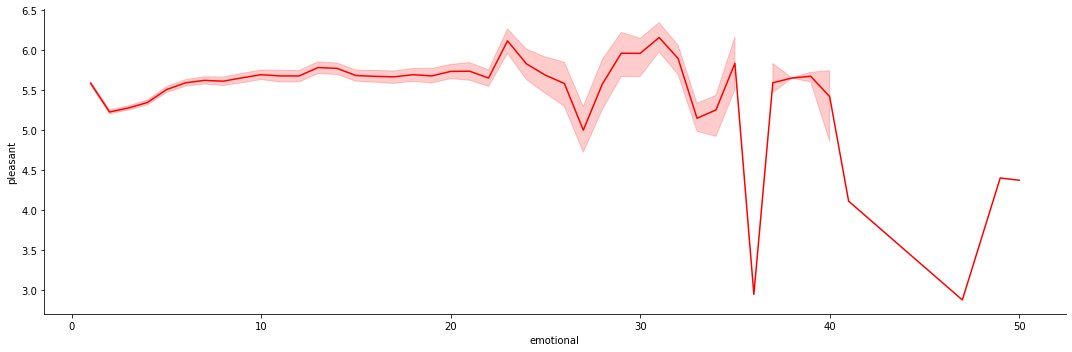

In [32]:
plt.figure(figsize=(25,25))
sns.relplot(x="emotional", y="pleasant", data=df1,kind='line',aspect=3,color="Red")
plt.show()

### Top Genre 

In [ ]:
c=df.genre.value_counts()[:10]
pub=c.head(15)
pub

In [ ]:
pub

In [ ]:
ind=c.index
ls=[]
for i in range(len(c)):
    t=[ind[i]]*c[i]
    ls+=t
plt.subplots(figsize=(25,5))
sns.countplot(ls)
plt.title("Top 10 Genres")

## Top Sentiments

In [ ]:
s=df.seeds.value_counts()[:10]
senti=s.head(15)
senti

In [ ]:
ind=s.index
ls=[]
for i in range(len(s)):
    t=[ind[i]]*s[i]
    ls+=t
plt.subplots(figsize=(25,5))
sns.countplot(ls)
plt.title("Top 10 seeds")

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")
from keras.models import Model
from keras.layers import LeakyReLU
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.layers.merge import concatenate
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

### Reading Dataset

In [ ]:
data = pd.read_csv(r"C:\Users\JOE\Documents\Imarticus Training Materials\Emotion-based-music-recommendation-system-main\Emotion-based-music-recommendation-system-main\fer2013.csv")

In [ ]:
data

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.head()

## Data Preprocessing

In [ ]:
data.dtypes

In [ ]:
data.info()

### Determining the  Output class labels

In [ ]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , 
             color = np.unique(data['emotion']) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
data = data.sample(frac=1)

### One Hot Encoding
Then, we will do one hot encoding operation to change the categorical labels as numeric labels to learning algorithm can work better in predictions process.

In [ ]:
labels = to_categorical(data[['emotion']], num_classes=7)

### Splitting the Data into train data

In [ ]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

In [ ]:
pixels = train_pixels.reshape((35887*2304,1))

### Standardization

## We will change the data structure to feed the standart scaler to implement standardization process to our data. Since StandartScaler() function only takes 2 dimensional array we will reshape the data then apply our scaler to make the mean zero and standart deviation as unit.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

## After that, we will reshape the data to make our image pixels ready to split operation.

In [ ]:
pixels = train_pixels.reshape((35887, 48, 48,1))

### Reshaping the data (48,48)

# Now, we have 35887 images with each containing 48x48 pixels. We will split the data into train,test and Validation data to feed and evaluate and validate our data with the ratio of 10%.

### Splitting the Data Test data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

## Analysing the Emotions based upon the Dataset Image Pixels

In [ ]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

### Data augmentation using ImageDataGenerator
We can do data augmentation to have more data to train and validate our model to prevent overfitting. Data augmentation can be done on training and validation sets as it helps the model become more generalize(comfortable) and robust

In [ ]:
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2) 

In [ ]:
datagen.fit(X_train)
valgen.fit(X_val)

In [ ]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_val, y_val, batch_size=64)

# Building the CNN MODEL 

"""RELU : The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, 
otherwise, it will output zero."""
## MaxPooling2D : Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.

## Dropout is a technique where randomly selected neurons are ignored during training.

## Softmax : It is mainly used to normalize neural networks output to fit between zero and one.

In [ ]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten()) 
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
      
  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  model.compile(
  optimizer = Adam(lr=0.0001), 
  loss='categorical_crossentropy', 
  metrics=['accuracy'])
  return model

In [ ]:
model=cnn_model()

## Model.compile is related to training your model. Actually, your weights need to optimize and this function can optimize them. In a way that your accuracy make increases. This was just one of the input parameters called 'optimizer'.

In [ ]:
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [ ]:
model.summary()

## Early stopping
Adding checkpointer to implement Early Stopping to prevent overfitting.

In [ ]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

### Fitting the Model to get the trained data models

In [ ]:
history = model.fit(train_generator,
                    epochs=5,
                    batch_size=64,   
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

In [ ]:
model.save('model1.h5')

In [ ]:
model = tf.keras.models.load_model('model1.h5')

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

In [ ]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

In [ ]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

# Loading weights from pretrained model

In [ ]:
model.load_weights('model1.h5')

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Not Attach OpenCL context to OpenCV. 

In [ ]:
cv2.ocl.setUseOpenCL(False)
# return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)

# Return video from the first webcam on your computer.

In [ ]:
cap = cv2.VideoCapture(0)

# Text or heading's

In [ ]:
st.markdown("<h2 style='text-align: center; color: white;'><b>Emotion based music recommendation</b></h2>", unsafe_allow_html=True)
st.markdown("<h5 style='text-align: center; color: grey;'><b>Click on the name of recommended song to reach website</b></h5>", unsafe_allow_html=True)

In [ ]:


    while True:
        # Find haar cascade to draw bounding box around face
        ret, frame = cap.read()
        if not ret:
            break
        facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
            prediction = model.predict(cropped_img)
            maxindex = int(np.argmax(prediction))
            cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Just for separation

In [ ]:
st.write("")

# Normal text
st.markdown("<h5 style='text-align: center; color: grey;'><b>Recommended song's with artist names</b></h5>", unsafe_allow_html=True)

# Just for separation
st.write("---------------------------------------------------------------------------------------------------------------------")

try:
    # l = iterator over link column in dataframe
    # a = iterator over artist column in dataframe
    # i = iterator from (0 to 30)
    # n = iterator over name column in dataframe
    for l,a,n,i in zip(new_df["link"],new_df['artist'],new_df['name'],range(30)):

        # Recommended song name
        st.markdown("""<h4 style='text-align: center;'><a href={}>{} - {}</a></h4>""".format(l,i+1,n),unsafe_allow_html=True)

        # Artist name
        st.markdown("<h5 style='text-align: center; color: grey;'><i>{}</i></h5>".format(a), unsafe_allow_html=True)

        # Just for separation
        st.write("---------------------------------------------------------------------------------------------------------------------")
except:
    pass
